In [ ]:
# Import required packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Loading the cleaned data file
df = pd.read_excel('merged_job_data.xlsx')

In [ ]:
# SLide 6- Jobs Data Summary

# Displaying all fields (columns), their data types, and non-null counts
df_info = df.info()

# Creating a DataFrame to show the count of null and non-null values
null_non_null_count = pd.DataFrame({
    'Field': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum()
})

# Display the result
print(null_non_null_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        1734 non-null   object 
 1   State            1566 non-null   object 
 2   Remote           1734 non-null   bool   
 3   Software Skills  1734 non-null   object 
 4   Employment Type  1734 non-null   object 
 5   Salary Min       1323 non-null   float64
 6   Salary Max       1323 non-null   float64
 7   Job Description  1725 non-null   object 
dtypes: bool(1), float64(2), object(5)
memory usage: 96.7+ KB
                           Field Data Type  Non-Null Count  Null Count
Job Title              Job Title    object            1734           0
State                      State    object            1566         168
Remote                    Remote      bool            1734           0
Software Skills  Software Skills    object            1734           0
Employment Type  

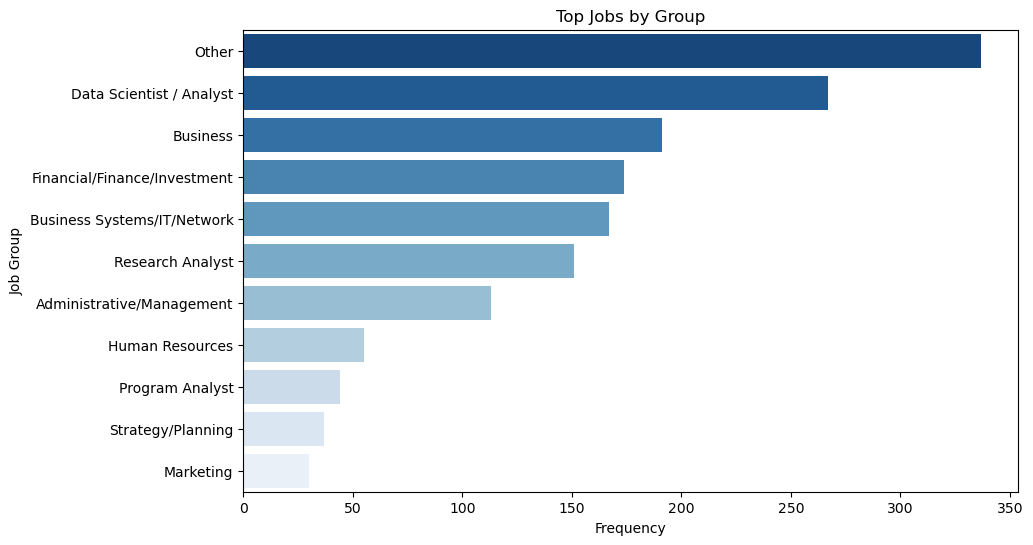

Job Group
Other                           337
Data Scientist / Analyst        267
Business                        191
Financial/Finance/Investment    174
Business Systems/IT/Network     167
Research Analyst                151
Administrative/Management       113
Human Resources                  55
Program Analyst                  44
Strategy/Planning                37
Marketing                        30
Name: count, dtype: int64


In [ ]:
# Slide 8- Job clustering.

# Create key for job clustering by dividing
key_to_job_group = {
    'Financial/Finance/Investment': ['Financial', 'Finance', 'Investment', 'Banking', 'Underwriting'],
    'Program Analyst': ['Program'],
    'Data Scientist / Analyst': ['Data Scientist', 'Data Analyst'],
    'Human Resources': ['HR', 'Human Resources', 'Personnel', 'Benefits', 'Retirement', 'Compensation'],
    'Business Systems/IT/Network': ['Business Systems', 'Enterprise', 'IT', 'Information', 'Network', 'Systems', 'Recruitment', 'Talent'],
    'Accounting & Budget': ['Accounting', 'Budget'],
    'Acquisitions Analyst': ['Acquisitions'],
    'Administrative/Management': ['Administrative', 'Management', 'Operations', 'Production'],
    'Application Analyst': ['Application'],
    'Actuarial Analyst': ['Actuarial'],
    'Research Analyst': ['Research', 'Researcher'],
    'Behavior': ['Behavior'],
    'Payroll & Billing': ['Payroll', 'Billing'],
    'Business': ['Business'],
    'Strategy/Planning': ['Strategy', 'Strategic', 'Planning', 'FP&A'],
    'Crime': ['Crime'],
    'Health care': ['Health'],
    'Marketing': ['Marketing', 'Ad'],
    'Legal/Compliance': ['Legal', 'Compliance', 'Grievance'],
    'Behavior': ['Behavior'],
    'Machine Learning/ AI / Predictive': ['Machine Learning', 'AI', 'Predictive'],
    'Product': ['Product'],
    'Supply Chain/Procurement': ['Supply', 'Supply Chain', 'Procurement', 'Inventory'],
    'Sustainability': ['Sustainability'],
    'Web': ['Web'],

}

# Function to categorize job titles.
def group_job_title(title):
    for group, keywords in key_to_job_group.items():
        if any(keyword in title for keyword in keywords):
            return group
    return 'Other'

# Create a new column with the categorized job titles.
df['Job Group'] = df['Job Title'].apply(group_job_title)

job_group_count = df['Job Group'].value_counts().head(11)

plt.figure(figsize=(10,6))
sns.barplot(x=job_group_count.values, y=job_group_count.index, palette='Blues_r')
plt.title('Top Jobs by Group')
plt.xlabel('Frequency')
plt.ylabel('Job Group')
plt.show()

print(job_group_count)

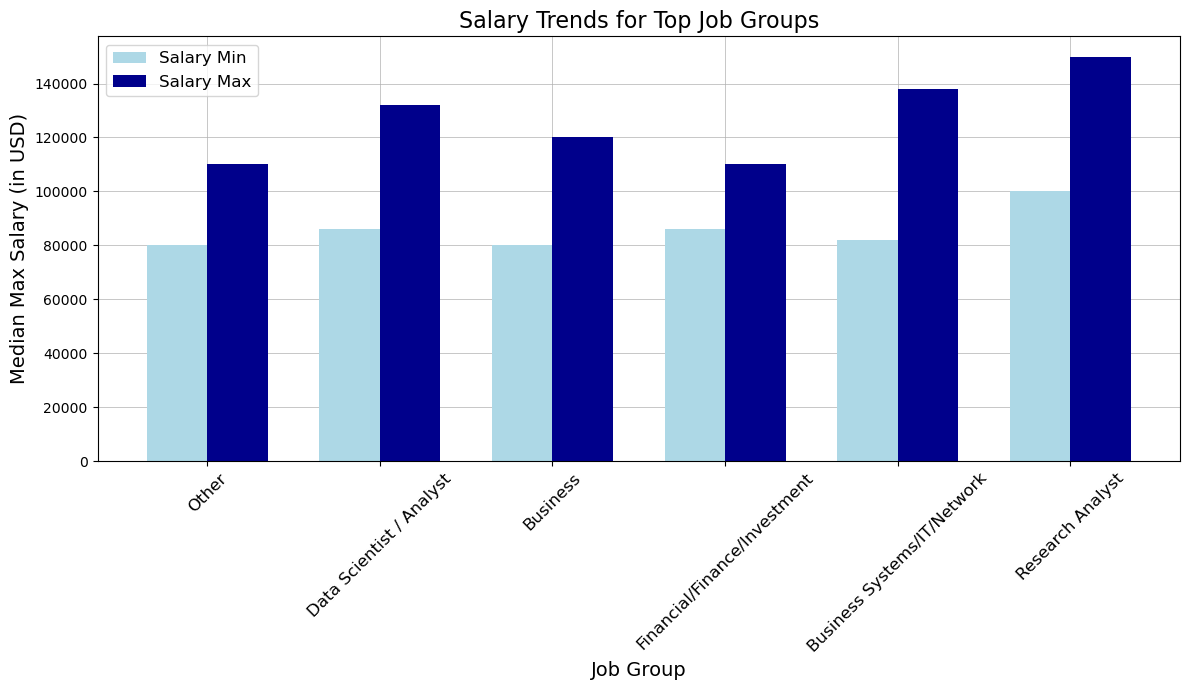

In [ ]:
# Slide 9- Job Clustering by Median Salary

# Finding the top 5 most frequently used job titles
top_6_titles = df['Job Group'].value_counts().head(6).index

# Filtering the DataFrame to include only the top 5 job titles
filtered_df = df[df['Job Group'].isin(top_6_titles)]

# Grouping by 'Job Title' and calculating the average 'Salary Min' and 'Salary Max'
salary_trends = filtered_df.groupby('Job Group')[['Salary Min', 'Salary Max']].median().reset_index()
salary_trends = salary_trends.set_index('Job Group').reindex(df['Job Group'].value_counts().head(6).index).reset_index()
# Limiting job titles to the first 3 words for better readability
#salary_trends['Short Job Title'] = salary_trends['Job Title'].apply(lambda x: ' '.join(x.split()[:3]))

# Create a larger figure for the plot
fig2, ax = plt.subplots(figsize=(12, 7))

# Creating an index for the bars
index = np.arange(len(salary_trends['Job Group']))

# Bar width
bar_width = 0.35

# Bar plot for Salary Min
ax.bar(index, salary_trends['Salary Min'], bar_width, label='Salary Min', color='lightblue')

# Bar plot for Salary Max (side-by-side with Salary Min)
ax.bar(index + bar_width, salary_trends['Salary Max'], bar_width, label='Salary Max', color='darkblue')

# Adding labels and title
ax.set_xlabel('Job Group', fontsize=14)
ax.set_ylabel('Median Max Salary (in USD)', fontsize=14)
ax.set_title('Salary Trends for Top Job Groups', fontsize=16)

# Rotating x-axis labels for better readability (using the shortened job titles)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(salary_trends['Job Group'], rotation=45, fontsize=12)

# Adding a legend to differentiate Salary Min and Salary Max
ax.legend(loc='upper left', fontsize=12)

ax.grid(True, which='both', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# SLide 10- General Salary Distribution
# Ask Nidhi

In [ ]:
# Slide 11- Top 5 Job Locations

# Create a series that counts number of job postings for each state.
Series= df['State'].value_counts()
# Print the top 5 states
print(Series[:5])

State
CA    1243
NY      51
TX      32
VA      26
FL      20
Name: count, dtype: int64


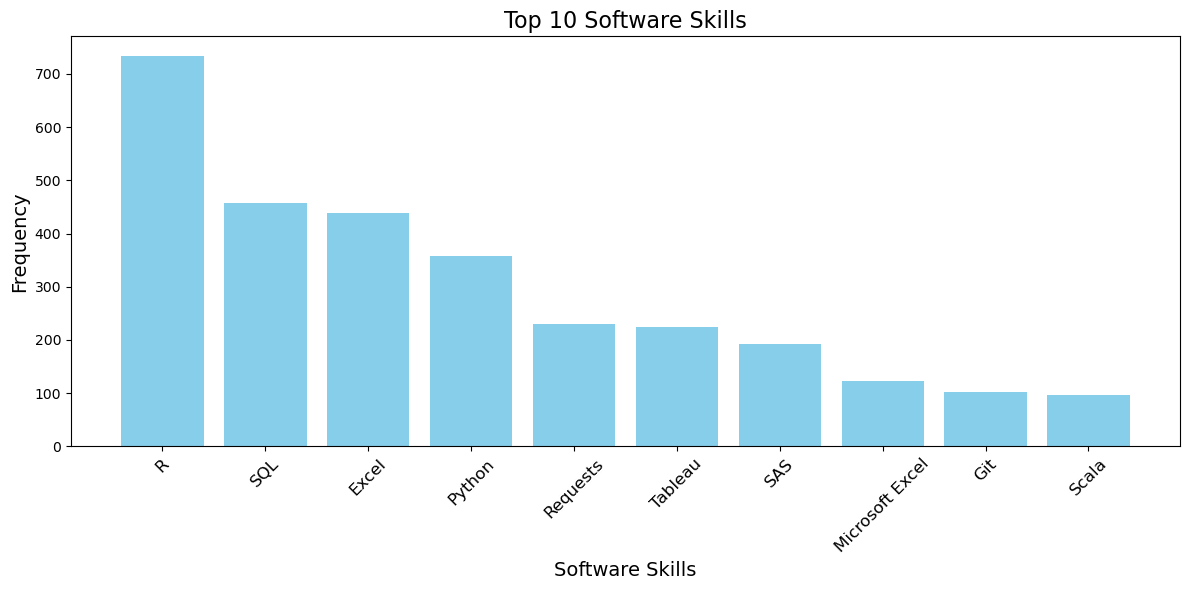

In [ ]:
# Slide 12- Top Software Skills

# Convert the 'Software Skills' column from list format to a comma-separated string
df['Software Skills'] = df['Software Skills'].apply(lambda x: ', '.join(eval(x)) if isinstance(x, str) else x)

# Split the skills into individual entries and flatten the list, dropping any empty strings
all_skills = df['Software Skills'].str.cat(sep=', ').split(', ')
all_skills = [skill.strip() for skill in all_skills if skill.strip()]  # Remove empty strings

# Count the occurrences of each skill
skill_counts = Counter(all_skills)

# Get the top 10 most common skills, ensuring we replace any blanks or NaNs
top_skills = skill_counts.most_common(10)  # Get top 10 skills
most_common_skill = skill_counts.most_common(1)[0][0]  # Get the most common skill

top_skills.append((most_common_skill, skill_counts[most_common_skill]))  # Add the most common skill again

# Convert to DataFrame for better visualization
top_skills_df = pd.DataFrame(top_skills, columns=['Software Skill', 'Frequency'])

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_skills_df['Software Skill'], top_skills_df['Frequency'], color='skyblue')
plt.title('Top 10 Software Skills', fontsize=16)
plt.xlabel('Software Skills', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


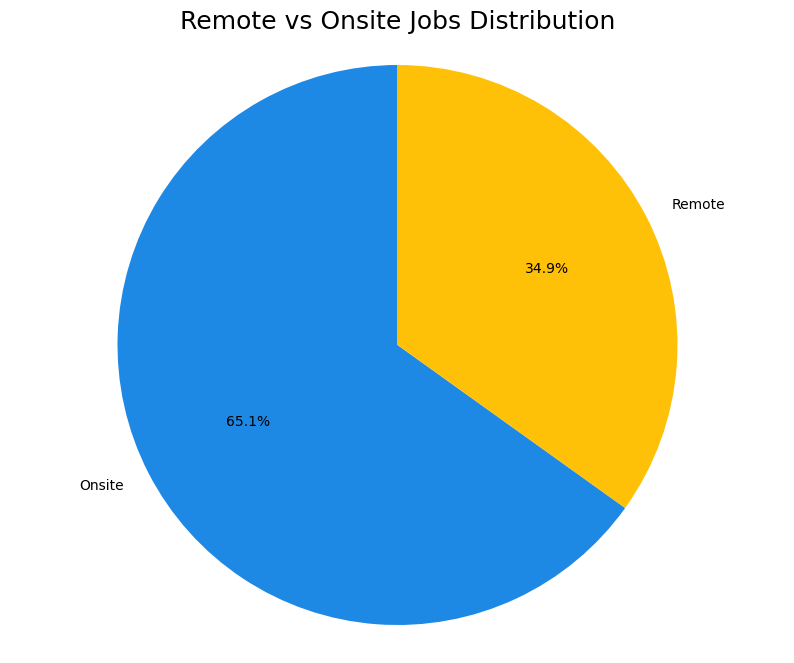

In [ ]:
# SLide 13- Distribution of Remote vs Onsite.
# Count the occurrences of 'Remote' (assuming 'Remote' column contains boolean values True/False)
remote_counts = df['Remote'].value_counts()

# Rename the indices from True/False to 'Remote'/'Onsite'
remote_counts.index = remote_counts.index.map({True: 'Remote', False: 'Onsite'})

# Create a pie chart for Remote vs Onsite jobs with blue for Remote and yellow for Onsite
plt.figure(figsize=(10, 8))  # Increase the size of the figure
plt.pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1E88E5', '#FFC107'])  # Blue for Remote, Yellow for Onsite
plt.title('Remote vs Onsite Jobs Distribution', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

# Display the pie chart
plt.show()

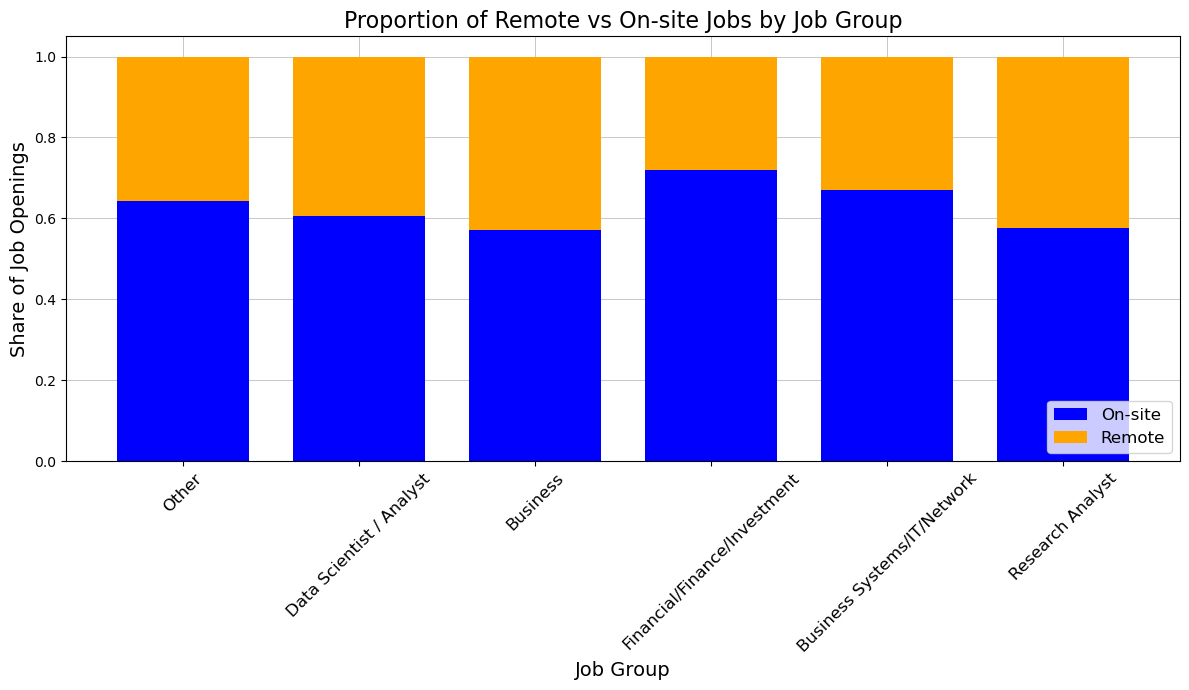

In [ ]:
# Slide 14- Proportion for Remote vs Onsite roles via Clustering
top_6_titles = df['Job Group'].value_counts().head(6).index

# Filtering the DataFrame to include only the top 6 job titles
filtered_df = df[df['Job Group'].isin(top_6_titles)]

# Calculate the counts of remote and on-site jobs in each job group
job_group_remote_counts = filtered_df.groupby(['Job Group', 'Remote']).size().unstack(fill_value=0)

# Calculate the total jobs in each job group
job_group_total_counts = job_group_remote_counts.sum(axis=1)

# Calculate the proportion of remote and on-site jobs in each job group
job_group_proportions = job_group_remote_counts.div(job_group_total_counts, axis=0)

# Sort the DataFrame by job group counts to match the order of top 6 job groups
job_group_proportions = job_group_proportions.reindex(df['Job Group'].value_counts().head(6).index)

# Create a larger figure for the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Creating an index for the bars
index = np.arange(len(job_group_proportions))

# Bar width
bar_width = 0.75

# Stacked bar plot
ax.bar(index, job_group_proportions[False], bar_width, label='On-site', color='blue')
ax.bar(index, job_group_proportions[True], bar_width, bottom=job_group_proportions[False], label='Remote', color='orange')

# Adding labels and title
ax.set_xlabel('Job Group', fontsize=14)
ax.set_ylabel('Share of Job Openings', fontsize=14)
ax.set_title('Proportion of Remote vs On-site Jobs by Job Group', fontsize=16)

# Rotating x-axis labels for better readability
ax.set_xticks(index)
ax.set_xticklabels(job_group_proportions.index, rotation=45, fontsize=12)

# Adding a legend
ax.legend(loc='lower right', fontsize=12)

# Set gridlines behind the bars
ax.grid(True, which='both', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Adjust the layout to make more space for the legend
plt.subplots_adjust(top=0.85, right=0.85)

# Display the plot
plt.tight_layout()
plt.show()

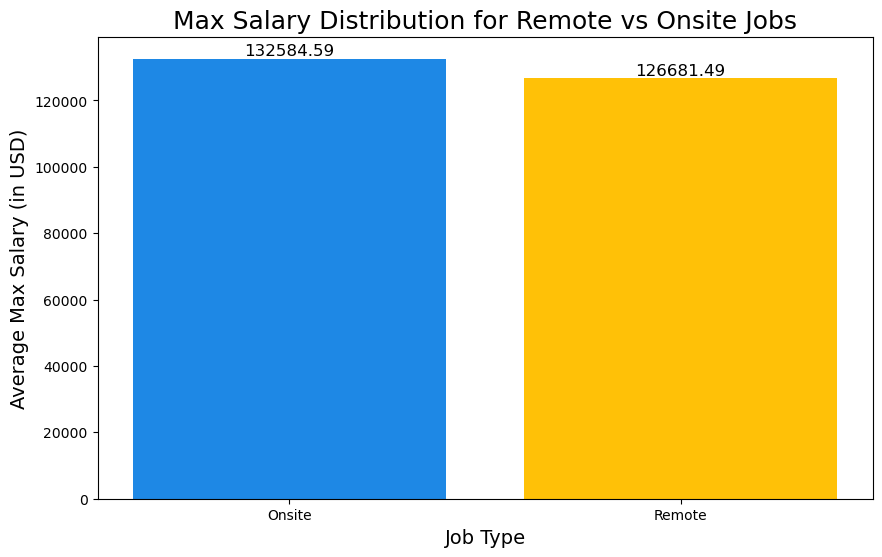

In [ ]:
# Slide 14- Median Salary for Remote vs Onsite.

# Filter out rows with null values in 'Salary Max' and 'Remote' columns
df_cleaned = df[['Remote', 'Salary Max']].dropna()

# Grouping by 'Remote' and calculating the mean of 'Salary Max'
salary_distribution = df_cleaned.groupby('Remote')['Salary Max'].mean().reset_index()

# Rename the indices from True/False to 'Remote'/'Onsite'
salary_distribution['Remote'] = salary_distribution['Remote'].map({True: 'Remote', False: 'Onsite'})

# Create a bar chart for Max Salary Distribution
plt.figure(figsize=(10, 6))  # Increase the size of the figure
bars = plt.bar(salary_distribution['Remote'], salary_distribution['Salary Max'], color=['#1E88E5', '#FFC107'])  # Blue for Remote, Yellow for Onsite
plt.title('Max Salary Distribution for Remote vs Onsite Jobs', fontsize=18)
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Average Max Salary (in USD)', fontsize=14)
plt.xticks(rotation=0)  # No rotation for x-axis labels

# Adding the max salary values inside the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)  # Add text annotation

# Display the bar chart
plt.show()